In [23]:
!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df_vacs = pd.read_csv('dados_vacinas.csv', encoding = 'ISO-8859-1')

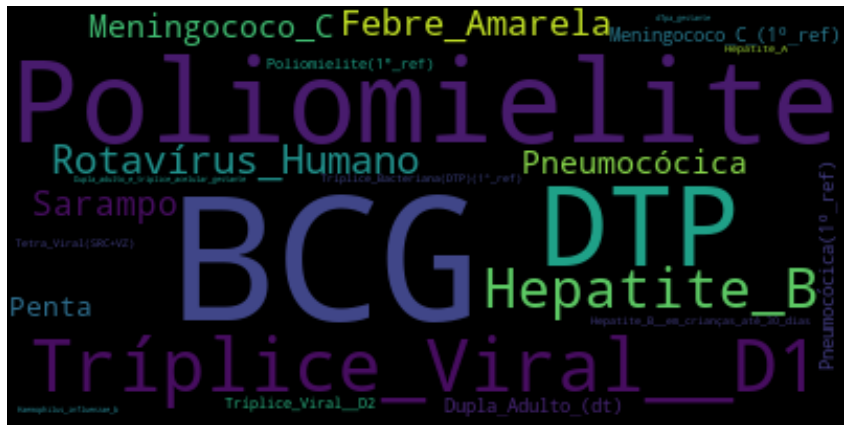

In [26]:
# vamos trocar os espaços dos nomes dos imunizantes
# por um underline, para as palavras aparecerem juntas
# essa parte não é obrigatória
df_vacs['Imuno'] = df_vacs['Imuno'].str.replace(' ', '_',)

# cria um dicionário com os dados, necessário para a word cloud
d = {}
for Imuno, Total in df_vacs.values:
    d[Imuno] = Total

# inicializa uma word cloud
wordcloud = WordCloud()

# gera uma wordcloud através do dicionário de frequências
wordcloud.generate_from_frequencies(frequencies = d)

plt.figure(figsize = (15, 10)) # tamanho do gráfico
plt.imshow(wordcloud, interpolation = 'bilinear') # plotagem da nuvem de palavras
plt.axis('off') # remove as bordas
plt.show() # mostra a word cloud

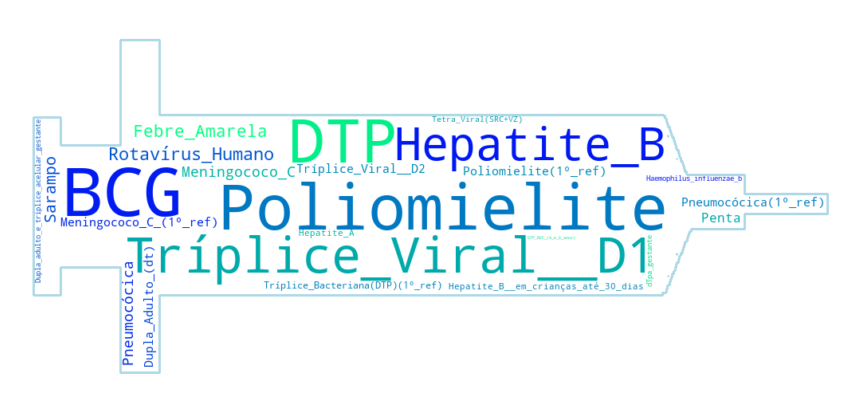

In [27]:
# abre uma imagem e a transforma em um array do numpy
image_mask = np.array(Image.open('seringa.png'))

# inicializa uma word cloud
wordcloud = WordCloud(background_color = 'white', # cor de fundo
                      width = 1000, # largura
                      height = 500, # altura
                      mask = image_mask, # imagem utilizada
                      contour_width = 3, # espessura do contorno
                      contour_color = 'lightblue', # cor do contorno
                      colormap = 'winter') # cor das palavras

# gera uma wordcloud através do dicionário de frequências
wordcloud.generate_from_frequencies(frequencies = d)

plt.figure(figsize = (15, 10)) # tamanho do gráfico
plt.imshow(wordcloud, interpolation = 'bilinear') # plotagem da nuvem de palavras
plt.axis('off') # remove as bordas
plt.show() # mostra a word cloud

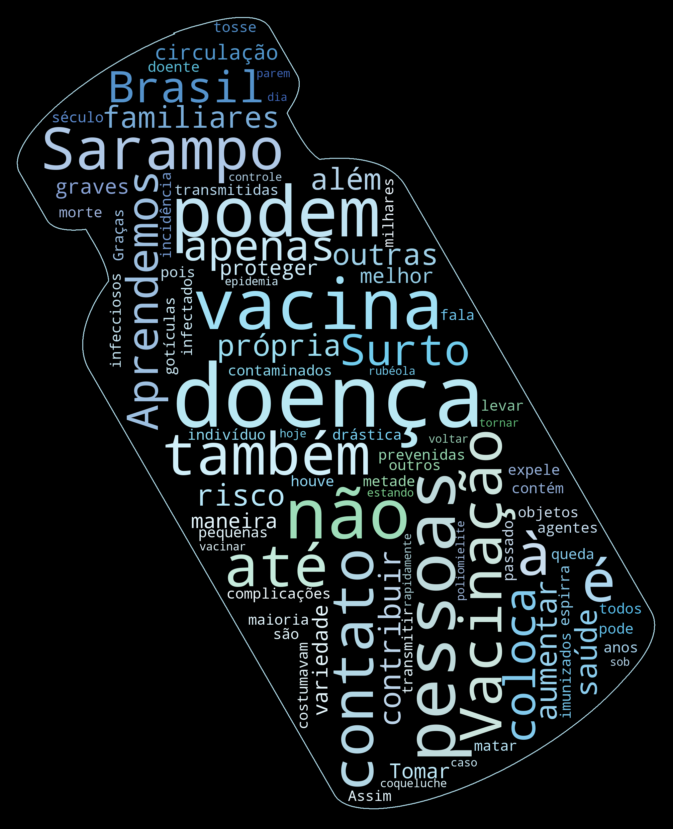

In [36]:
# importa o texto
texto = open('texto_exemplo.txt').read()

# importa as stopwords em português
stopwords = open('stopwords.txt').read()

# transforma as stopwords em um lista
lista_stopwords = stopwords.split(' \n')

# abre uma imagem e a transforma em um array do numpy
mask_frasco = np.array(Image.open('frasco_vacina.png'))

# pega as cores da imagem acima
mask_cores = ImageColorGenerator(mask_frasco)

# inicializa uma word cloud
wordcloud = WordCloud(stopwords = lista_stopwords,
                      mask = mask_frasco, # imagem utilizada
                      background_color = 'black', # cor de fundo
                      width = 1000, # largura
                      height = 500, # altura
                      contour_width = 2, # espessura do contorno
                      contour_color = 'lightblue', # cor do contorno
                      color_func = mask_cores) # cores das palavras

# gera uma wordcloud através do texto
wordcloud.generate(texto)

plt.figure(figsize = (20, 15), facecolor = 'k') # tamanho do gráfico
plt.imshow(wordcloud, interpolation = 'bilinear') # plotagem da nuvem de palavras
plt.axis('off') # remove as bordas
plt.show() # mostra a word cloud

